# Kmeans
In this code snippet, I will implement the Kmeans algorithm from scratch.

It is a `Unsupervised` method that does not need a label.

Here is the procedure:
- Random initialization of the centroids (In sklearn code, the initial centroids can be initialized by certain methods like "kmeans++")
- Calculate the sum of squared errors
- Assign a centroid to each of the observations
- Calculate the sum of total errors
- Recalculate the position of the centroids


In [6]:
import numpy as np
from numpy import ndarray

class KMeans():
    def __init__(self,n_clusters:int,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.mean_squared_error = None
        self.labels =None
        
    def fit(self,X:ndarray,y:ndarray):
        """fit the KMeans model to the given X and y

        Args:
            X (ndarray): features, with shape (n_samples, n_features)
            y (ndarray): labels, with shape (n_samples)
        """
        # initialize the centroids
        centroids = X[np.random.choice(range(len(X)),self.n_clusters)]
        
        # begin the loop
        for i in range(self.max_iter):
            # Calculate the distance between the every centroid
            distances = np.sqrt(((X-centroids[:,np.newaxis])**2).sum(axis=2))
            # Get the closest centroid
            closest_centroids = np.argmin(distances, axis=0)
            # Calculate the squrared error of every sample
            error = np.sum(distances[closest_centroids, range(len(X))])
        
            # assign a centroid to each of the observations
            for j in range(self.n_clusters):
                centroids[j] = X[closest_centroids==j].mean(axis=0)
                
        # at the end of the loop, store the values of this data set
        self.mean_squared_error = error
        self.centroids = centroids
        self.labels= closest_centroids
        return self
    
    def predict(self,X:ndarray):
        distances = np.sqrt(((X-self.centroids[:,np.newaxis])**2).sum(axis=2))
        closest_centroids = np.argmin(distances, axis=0)
        return closest_centroids

In [7]:
from sklearn.datasets import load_iris
data = load_iris()

In [8]:
km = KMeans(3,1000)
km.fit(data.data,data.target)
km.centroids

array([[4.73181818, 2.92727273, 1.77272727, 0.35      ],
       [5.19375   , 3.63125   , 1.475     , 0.271875  ],
       [6.31458333, 2.89583333, 4.97395833, 1.703125  ]])

In [9]:
km.mean_squared_error

124.02237270028425

Visualize the cluster results.

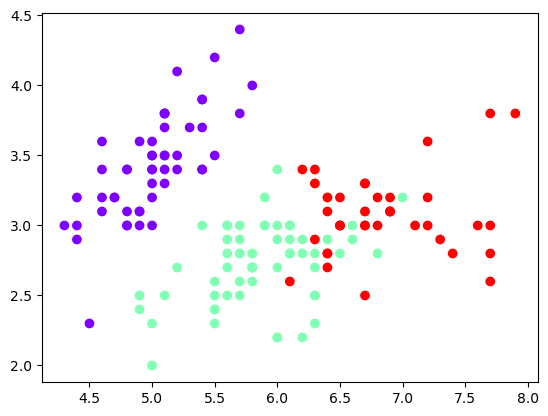

In [5]:
import matplotlib.pyplot as plt
X=data.data[:,:2]
plt.scatter(X[:,0], X[:,1], c=km.labels, cmap='rainbow')